# Training two models with ANN algorithem on two diffrent datasets

### SCdataset_augmented_pca info :

In [17]:
import numpy as np
import pandas as pd

In [18]:
df_pca = pd.read_csv('./scdataset_augmented_pca.csv')
df_pca.head()

,label,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,...,Opcode weight BYTE,Opcode weight SHL,Opcode weight SHR,Opcode weight SAR,Opcode weight SHA3,Opcode weight ADDRESS,Opcode weight BALANCE,Opcode weight ORIGIN,Opcode weight CALLER,Opcode weight CALLVALUE
0,1,-18593.541370,-3790.875814,-138.974332,-91.802049,12.378125,3.447678,10.138003,10.654542,-1.873592,...,-0.000029,0.000137,0.001712,0.000145,0.000407,-0.001050,0.000370,0.000266,-0.000974,-0.000517
1,1,-18592.757719,-3791.210512,-152.913929,-92.559204,12.408262,3.430857,10.158206,10.644315,-1.771356,...,0.000313,0.000423,0.004985,-0.000002,0.000086,-0.000765,0.000582,0.000483,0.000068,0.000131
2,1,-17910.247278,5483.089822,1089.656944,1328.476865,105.730463,57.336378,-34.509002,10.313061,-9.811058,...,0.000103,-0.001249,-0.006844,0.000511,0.001433,0.002279,-0.000945,0.000661,0.002517,0.001490
3,1,-18292.621073,-970.489277,914.759864,132.257967,1.488585,-55.271777,14.903369,12.570071,4.274714,...,0.002983,0.004366,0.027147,-0.000023,-0.001055,0.012798,-0.002443,-0.014268,0.003822,-0.008043
4,1,-17944.107622,3809.662043,426.495360,283.519431,-28.989591,45.310233,-17.349726,-9.266915,3.454266,...,0.000401,-0.000803,-0.000682,0.000293,0.000743,0.002392,-0.003929,0.004556,0.002533,0.001894


In [19]:
df_pca.shape

(52915, 71)

In [20]:
df_pca['label'].value_counts()

label
0    26915
1    26000
Name: count, dtype: int64

# Preproccesing

In [21]:
x = df_pca.drop('label', axis=1)
y = df_pca['label']

In [22]:
x

,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,Weight bytecode_character_a,...,Opcode weight BYTE,Opcode weight SHL,Opcode weight SHR,Opcode weight SAR,Opcode weight SHA3,Opcode weight ADDRESS,Opcode weight BALANCE,Opcode weight ORIGIN,Opcode weight CALLER,Opcode weight CALLVALUE
0,-18593.541370,-3790.875814,-138.974332,-91.802049,12.378125,3.447678,10.138003,10.654542,-1.873592,0.150567,...,-0.000029,0.000137,0.001712,0.000145,0.000407,-0.001050,0.000370,0.000266,-0.000974,-0.000517
1,-18592.757719,-3791.210512,-152.913929,-92.559204,12.408262,3.430857,10.158206,10.644315,-1.771356,-0.004859,...,0.000313,0.000423,0.004985,-0.000002,0.000086,-0.000765,0.000582,0.000483,0.000068,0.000131
2,-17910.247278,5483.089822,1089.656944,1328.476865,105.730463,57.336378,-34.509002,10.313061,-9.811058,16.841042,...,0.000103,-0.001249,-0.006844,0.000511,0.001433,0.002279,-0.000945,0.000661,0.002517,0.001490
3,-18292.621073,-970.489277,914.759864,132.257967,1.488585,-55.271777,14.903369,12.570071,4.274714,-28.372130,...,0.002983,0.004366,0.027147,-0.000023,-0.001055,0.012798,-0.002443,-0.014268,0.003822,-0.008043
4,-17944.107622,3809.662043,426.495360,283.519431,-28.989591,45.310233,-17.349726,-9.266915,3.454266,6.162737,...,0.000401,-0.000803,-0.000682,0.000293,0.000743,0.002392,-0.003929,0.004556,0.002533,0.001894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52910,15144.460013,-4026.866169,-620.863935,-367.719878,-27.555636,-19.819304,-10.738579,-20.091275,6.287269,-7.749637,...,-0.000892,-0.002015,-0.017116,-0.000154,0.000115,0.001916,-0.000151,-0.000911,-0.001229,-0.002075
52911,13517.358095,-5418.167371,436.830855,-163.893606,-3.375523,-6.777695,-3.418151,8.641210,-9.739129,0.292340,...,0.000107,-0.000734,-0.009902,-0.000777,-0.000753,0.018675,-0.001606,0.011577,0.005916,-0.006062
52912,14467.047684,-5473.575569,468.875751,-163.555933,-6.932170,-5.752227,-3.799309,8.365047,-4.860775,0.832913,...,-0.000585,-0.000682,-0.005990,-0.000104,-0.000257,0.002651,0.001091,0.005951,0.006829,-0.000505
52913,15481.677909,-4044.975186,-566.492273,-363.591018,-26.671330,-21.669856,-9.563522,-20.658614,9.610103,-8.157332,...,-0.000872,-0.001546,-0.014799,-0.000164,0.000072,0.001996,-0.000155,-0.000513,-0.001369,-0.001100


In [23]:
y

0        1
1        1
2        1
3        1
4        1
        ..
52910    1
52911    1
52912    1
52913    1
52914    1
Name: label, Length: 52915, dtype: int64

In [24]:
x = np.array(x)
y = np.array(y)

In [25]:
x

array([[-1.85935414e+04, -3.79087581e+03, -1.38974332e+02, ...,
         2.65780453e-04, -9.74390204e-04, -5.17436809e-04],
       [-1.85927577e+04, -3.79121051e+03, -1.52913929e+02, ...,
         4.83415024e-04,  6.83272189e-05,  1.31466317e-04],
       [-1.79102473e+04,  5.48308982e+03,  1.08965694e+03, ...,
         6.61311640e-04,  2.51723207e-03,  1.49020268e-03],
       ...,
       [ 1.44670477e+04, -5.47357557e+03,  4.68875751e+02, ...,
         5.95090275e-03,  6.82884699e-03, -5.04696957e-04],
       [ 1.54816779e+04, -4.04497519e+03, -5.66492273e+02, ...,
        -5.13046034e-04, -1.36894020e-03, -1.09959207e-03],
       [ 1.61340874e+04,  1.33566510e+04, -2.37820783e+02, ...,
        -1.93435402e-03,  8.93293468e-04, -2.22475958e-03]])

In [26]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Normalizing Data

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [28]:
x

array([[-2.06960036, -0.52878281, -0.13277157, ...,  0.04056768,
        -0.18728984, -0.09929623],
       [-2.06952782, -0.52882831, -0.14524021, ...,  0.07863982,
         0.00774348,  0.03464243],
       [-2.00634739,  0.73188376,  0.96620974, ...,  0.10976036,
         0.46579478,  0.3150962 ],
       ...,
       [ 0.99083979, -0.75752242,  0.4109358 , ...,  1.03510085,
         1.27225354, -0.09666662],
       [ 1.08476477, -0.56332408, -0.51517615, ..., -0.0956772 ,
        -0.26108778, -0.21945761],
       [ 1.14515874,  1.80218483, -0.22118736, ..., -0.34431528,
         0.16204791, -0.45170095]])

# Train/Test

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
x_train.shape, y_train.shape

((42332, 70), (42332,))

In [31]:
x_test.shape

(10583, 70)

# ANN algorithm  on scdataset_augmented_pca

In [32]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=128, max_iter=200)
model.fit(x_train, y_train)

f:\Programming\python\python learning and projects_summer 1403\machinlearning course_youtube\Codes\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=128)

In [33]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,mean_squared_error

acc_train_pca = accuracy_score(y_train, y_pred_train)
acc_test_pca = accuracy_score(y_test, y_pred_test)
loss_pca = mean_squared_error(y_test, y_pred_test)

acc_test_pca, acc_train_pca, loss_pca

(0.9486912973636965, 0.9818340735141264, 0.05130870263630351)

In [35]:
p_pca = precision_score(y_test, y_pred_test)
r_pca = recall_score(y_test,y_pred_test)

r_pca,p_pca

(0.9601074031453778, 0.9372776633589216)

# SCdataset_augmented_ig info :

In [37]:
df_ig = pd.read_csv('./scdataset_augmented_ig.csv')
df_ig.head()

,label,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,...,Opcode weight SWAP1,Opcode weight SWAP2,Opcode weight SWAP3,Opcode weight SWAP4,Opcode weight LOG1,Opcode weight LOG3,Opcode weight CALL,Opcode weight RETURN,Opcode weight REVERT,Opcode weight INVALID
0,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,117,8370,0.059498,0.151732,0.036201,0.013381,0.055078,0.039904,0.069534,...,0.081346,0.034862,0.013456,0.000612,0.000612,0.003058,0.000000,0.005505,0.009174,0.001223
3,1,120,2586,0.069606,0.176334,0.036736,0.030936,0.064192,0.020495,0.080046,...,0.082863,0.015066,0.001883,0.000000,0.005650,0.003766,0.001883,0.005650,0.022599,0.000000
4,1,193,7002,0.068695,0.184090,0.048272,0.017566,0.069123,0.043559,0.088546,...,0.076372,0.035800,0.011933,0.000597,0.000597,0.001790,0.000000,0.005967,0.009547,0.001193


In [38]:
df_ig.shape

(52915, 76)

In [39]:
df_ig['label'].value_counts()

label
0    26915
1    26000
Name: count, dtype: int64

# Preproccesing

In [40]:
x = df_ig.drop('label', axis=1)
y = df_ig['label']

In [41]:
x

,Unnamed: 0,bytecode_len,Weight bytecode_character_6,Weight bytecode_character_0,Weight bytecode_character_8,Weight bytecode_character_4,Weight bytecode_character_5,Weight bytecode_character_2,Weight bytecode_character_1,Weight bytecode_character_a,...,Opcode weight SWAP1,Opcode weight SWAP2,Opcode weight SWAP3,Opcode weight SWAP4,Opcode weight LOG1,Opcode weight LOG3,Opcode weight CALL,Opcode weight RETURN,Opcode weight REVERT,Opcode weight INVALID
0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,117,8370,0.059498,0.151732,0.036201,0.013381,0.055078,0.039904,0.069534,0.004182,...,0.081346,0.034862,0.013456,0.000612,0.000612,0.003058,0.000000,0.005505,0.009174,0.001223
3,120,2586,0.069606,0.176334,0.036736,0.030936,0.064192,0.020495,0.080046,0.017015,...,0.082863,0.015066,0.001883,0.000000,0.005650,0.003766,0.001883,0.005650,0.022599,0.000000
4,193,7002,0.068695,0.184090,0.048272,0.017566,0.069123,0.043559,0.088546,0.006427,...,0.076372,0.035800,0.011933,0.000597,0.000597,0.001790,0.000000,0.005967,0.009547,0.001193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52910,33698,1660,0.074800,0.251340,0.052911,0.022959,0.092906,0.043340,0.091566,0.007798,...,0.090318,0.053370,0.028738,0.002053,0.002053,0.000000,0.000000,0.014369,0.016421,0.000000
52911,32140,240,0.075734,0.340933,0.069365,0.037500,0.066667,0.065933,0.059304,0.026468,...,0.000000,0.000000,0.000000,0.000000,0.021124,0.000000,0.000000,0.021124,0.021124,0.021124
52912,33167,357,0.097086,0.365758,0.053916,0.047180,0.087809,0.041515,0.051911,0.016387,...,0.024432,0.016288,0.000000,0.000000,0.012507,0.000000,0.000000,0.020652,0.028796,0.004363
52913,34035,1660,0.074178,0.251726,0.049642,0.024096,0.093976,0.042853,0.091290,0.008955,...,0.090571,0.053520,0.028818,0.002058,0.002334,0.000000,0.000000,0.014409,0.016468,0.000000


In [42]:
y

0        1
1        1
2        1
3        1
4        1
        ..
52910    1
52911    1
52912    1
52913    1
52914    1
Name: label, Length: 52915, dtype: int64

In [43]:
x = np.array(x)
y = np.array(y)

In [44]:
x

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.17000000e+02, 8.37000000e+03, 5.94982079e-02, ...,
        5.50458716e-03, 9.17431193e-03, 1.22324159e-03],
       ...,
       [3.31670000e+04, 3.57000000e+02, 9.70862624e-02, ...,
        2.06515231e-02, 2.87955618e-02, 4.36344575e-03],
       [3.40350000e+04, 1.66000000e+03, 7.41779774e-02, ...,
        1.44091016e-02, 1.64675447e-02, 0.00000000e+00],
       [3.36580000e+04, 1.79460000e+04, 7.84774596e-02, ...,
        3.16975555e-03, 9.27380759e-03, 2.78119665e-03]])

In [45]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Normalizing Data

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [47]:
x

array([[-2.04819123, -0.70058358, -1.70710777, ..., -0.99991516,
        -1.1225938 , -0.5110709 ],
       [-2.04809848, -0.70058358, -1.70710777, ..., -0.99991516,
        -1.1225938 , -0.5110709 ],
       [-2.03743283,  0.52457082,  0.09441752, ..., -0.25970224,
        -0.23273141, -0.32660328],
       ...,
       [ 1.02778347, -0.64832789,  1.23253298, ...,  1.77713675,
         1.6704317 ,  0.14694665],
       [ 1.10828598, -0.45760194,  0.53890109, ...,  0.93770576,
         0.4746757 , -0.5110709 ],
       [ 1.07332118,  1.92625283,  0.6690836 , ..., -0.57367175,
        -0.22308083, -0.09166011]])

# Train/Test

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [49]:
x_train.shape, y_train.shape

((42332, 75), (42332,))

In [50]:
x_test.shape

(10583, 75)

# ANN algorithm  on scdataset_augmented_ig

In [51]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=128, max_iter=200)
model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=128)

In [52]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,mean_squared_error

acc_train_ig = accuracy_score(y_train, y_pred_train)
acc_test_ig = accuracy_score(y_test, y_pred_test)
loss_ig = mean_squared_error(y_test, y_pred_test)

acc_test_ig, acc_train_ig, loss_ig

(0.9559671170745535, 0.9720778607200227, 0.04403288292544647)

In [54]:
p_ig = precision_score(y_test, y_pred_test)
r_ig = recall_score(y_test,y_pred_test)

r_ig, p_ig

(0.961465089660435, 0.9502262443438914)

# Comparison

train_data accuracy:

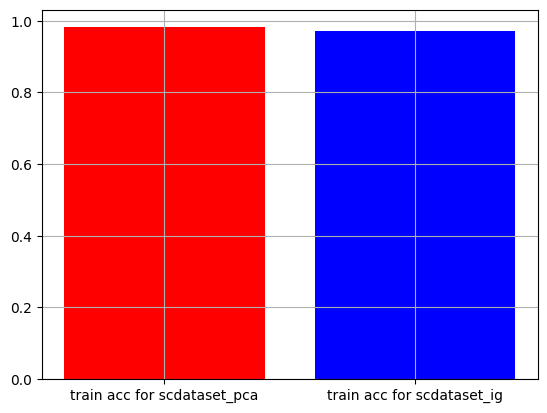

In [62]:
import matplotlib.pyplot as plt

acc_train = [acc_train_pca, acc_train_ig]
title = ["train acc for scdataset_pca", "train acc for scdataset_ig"]

colors = ['red', 'blue']
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

In [67]:
print("train accuracy for model trained on scdataset_pca:", acc_train_pca)
print("train accuracy for model trained on scdataset_ig:", acc_train_ig)

train accuracy for model trained on scdataset_pca: 0.9818340735141264
train accuracy for model trained on scdataset_ig: 0.9720778607200227


test_data accuracy:

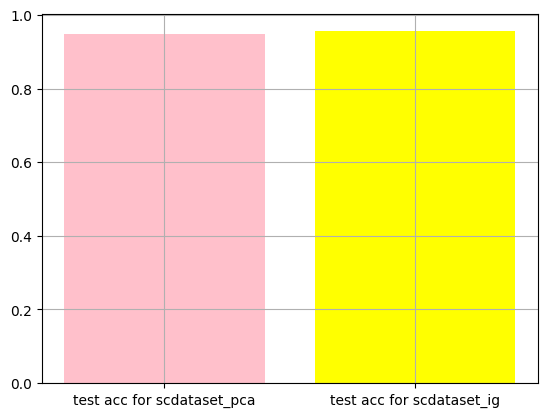

In [61]:
acc_test = [acc_test_pca, acc_test_ig]
title = ["test acc for scdataset_pca", "test acc for scdataset_ig"]

colors = ['pink', 'yellow']
plt.bar(title, acc_test, color = colors)
plt.grid()
plt.show()

In [69]:
print("test accuracy for model trained on scdataset_pca:", acc_test_pca)
print("test accuracy for model trained on scdataset_ig:", acc_test_ig)

test accuracy for model trained on scdataset_pca: 0.9486912973636965
test accuracy for model trained on scdataset_ig: 0.9559671170745535


loss:

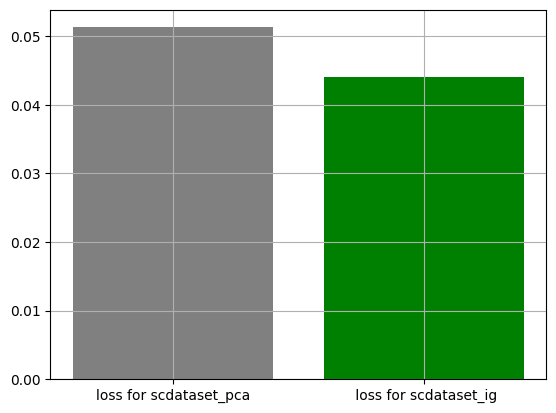

In [71]:
loss = [loss_pca, loss_ig]
title = ["loss for scdataset_pca", " loss for scdataset_ig"]

colors = ['gray', 'green']
plt.bar(title, loss, color = colors)
plt.grid()
plt.show()

In [72]:
print("loss for model trained on scdataset_pca:", loss_pca)
print("loss for model trained on scdataset_ig:", loss_ig)

loss for model trained on scdataset_pca: 0.05130870263630351
loss for model trained on scdataset_ig: 0.04403288292544647


precision:

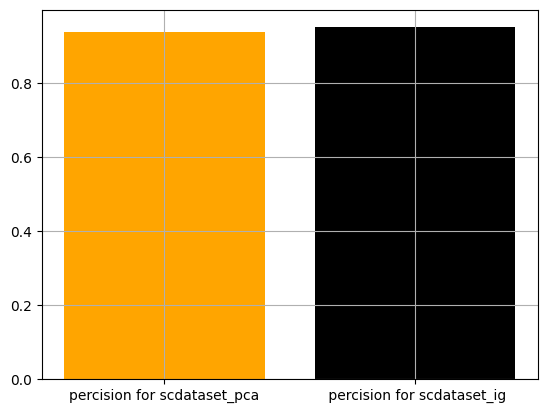

In [63]:
p = [p_pca, p_ig]
title = ["percision for scdataset_pca", " percision for scdataset_ig"]

colors = ['orange', 'black']
plt.bar(title, p, color = colors)
plt.grid()
plt.show()

In [70]:
print("precision for model trained on scdataset_pca:", p_pca)
print("precision for model trained on scdataset_ig:", p_ig)

precision for model trained on scdataset_pca: 0.9372776633589216
precision for model trained on scdataset_ig: 0.9502262443438914


recall:

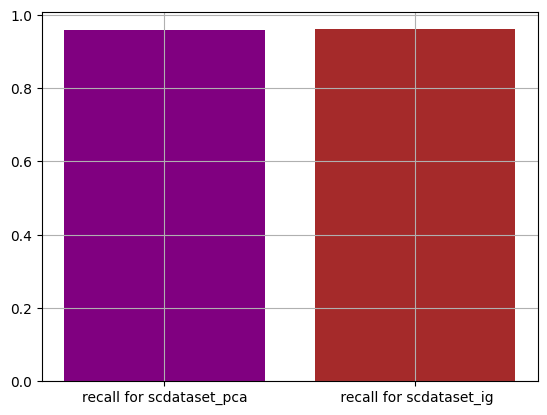

In [73]:
r = [r_pca, r_ig]
title = ["recall for scdataset_pca", " recall for scdataset_ig"]

colors = ['purple', 'brown']
plt.bar(title, r, color = colors)
plt.grid()
plt.show()

In [74]:
print("recall for model trained on scdataset_pca:", r_pca)
print("recall for model trained on scdataset_ig:", r_ig)

recall for model trained on scdataset_pca: 0.9601074031453778
recall for model trained on scdataset_ig: 0.961465089660435
